In [14]:
import random
import numpy as np
from scipy.io  import loadmat
import matplotlib.pyplot as plt
import math
aa = loadmat('Hmatrix.mat')
result = aa.items()
data = list(result)
HH = np.array(data)
print(HH.shape)
H = HH[3][1]

(4, 2)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  if __name__ == '__main__':


In [15]:
''' def bsc(aa,p):
  a = np.copy(aa)
  l = len(a)
  n=int(round(p*l,0))
  s = random.sample(range(0,l),n)
  #print(s)
  for i in s:
    a[i] = (a[i]+1)%2
  return a'''


def bsc(b,p):                 #function to implement BSC
  a = b.copy() 
  for i in range(0,len(a)):
    t = random.random()
    if t <= p:
      a[i] = (a[i] + 1) % 2
  return a


def rat(i):                  #function to calculate ratio i.e. likelihood
  if i==1:
    i = 0.999999999
  if i==0:
    i = 0.000000001
  return i/(1-i)

def c2v(aa,ii):             #function to calculate prob. of VN_i=1, using SPC deoding and formula given in Gallager's paper
  aa = np.delete(aa,ii) 
  length = len(aa)
  sum = 1
  for i in range(length):
    sum = sum * ( 2*aa[i] - 1)
  sum = (sum / 2) + 0.5
  return sum

4 3
3792
5056
ch =  [[  57  100  206  260]
 [  58  101  207  261]
 [  59  102  208  262]
 ...
 [1244 2464 3769 5046]
 [1245 2465 3770 5047]
 [1246 2466 3771 5048]]
var =  [[  22 1274 2566]
 [  23 1275 2567]
 [  24 1276 2568]
 ...
 [1191 2459 3717]
 [1192 2460 3718]
 [1193 2461 3719]]
p  =   0.0
AC=  [0. 0. 0. ... 0. 0. 0.]
VN =  [0. 0. 0. ... 0. 0. 0.]
cs =  [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 ...
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
cc =  [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 ...
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
vs =  [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 ...
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
vc =  [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 ...
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
cs =  [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 ...
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
cc =  [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 ...
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
vs =  [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 ...
 [0. 0. 0.]
 [0. 0. 0.

Text(0, 0.5, 'Probability of successful decoding')

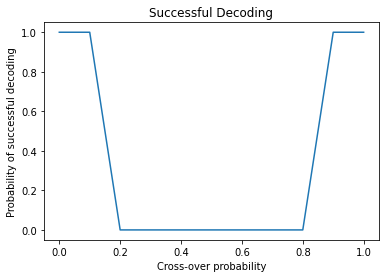

In [16]:
'''
H = np.array([[1,0,0,0,0,1,0,1,0,1,0,0],
              [1,0,0,1,1,0,0,0,0,0,1,0],
              [0,1,0,0,1,0,1,0,1,0,0,0],
              [0,0,1,0,0,1,0,0,0,0,1,1],
              [0,0,1,0,0,0,1,1,0,0,0,1],
              [0,1,0,0,1,0,0,0,1,0,1,0],
              [1,0,0,1,0,0,1,0,0,1,0,0],
              [0,1,0,0,0,1,0,1,0,1,0,0],
              [0,0,1,1,0,0,0,0,1,0,0,1]])
H = np.array([[ 0, 1, 0, 1, 1, 0, 0, 1],[1, 1, 1, 0, 0, 1, 0, 0],[0, 0, 1, 0, 0, 1, 1, 1],[1, 0, 0, 1, 1, 0, 1, 0]])
print(H)'''

dc = 0
dv = 0

for a in H[0]:                                                      #calculating  degree of check nodes
  if a==1:
    dc = dc + 1

for a in H[:,0]:                                                    #calculating  degree of variable nodes
  if a==1:
    dv = dv+1

print(dc,dv)
row = H.shape[0]                                                    #calculating  number of rows in H matrix
print(row)
col = H.shape[1]                                                    #calculating  number of rows in H matrix
print(col)

ch = np.array([[-1 for i in range(dc)] for j in range(row)])        #initializing ch (matrix representing which CN is connected to which VN) with -1
var = np.array([[-1 for i in range(dv)] for j in range(col)])       #initializing var (matrix representing which VN is connected to which CN) with -1

for i in range(0,row):                                              #this loop sets the value of ch and var matrices with the indicies of the edges in Tanner/Bipartite graph
  k = 0
  for j in range(0,col):
    if H[i][j] == 1:
      ch[i][k] = j;
      k = k+1
      for m in range(dv):
        if var[j][m] == -1:
          var[j][m] = i
          break

print('ch = ',ch)
print('var = ',var)

p=0
prob = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
arr = np.zeros(11)

for gg in range(0,11):
  p = prob[gg]                                        #cross-over probability of the channel
  print('p  =  ',p)
  count = 0

  for ns in range(0,1):                               #Monte-Carlo simulations   
    C = np.zeros((col))                               #codeword
    AC = bsc(C,p)                                     #after passing it through the BSC
    print('AC= ',AC)

    acp=np.zeros((col))         
    for i in range(0,col):                            #loading the VNs for the 1st iteration with prob.
      if AC[i]==1:
        acp[i] = 1-p
      else: 
        acp[i] = p
    
    print('VN = ',acp)

    cs = np.zeros((row,dc))

    for i in range(0,row):                            #sending prob. from VN to CN
      for j in range(0,dc):
        cs[i][j] = acp[ch[i][j]]

    print('cs = ',cs)

    ansp = np.array([-1]*col)         #array to store the calculated codeword after each iteration

    for u in range(0,30):             #assuming max. number of iterations required to decode correctly is 30
      cc = np.zeros((row,dc))         #matrix to store the calculated values of SPC decoding at corresponding indicies
      for i in range(0,row):
        for j in range(0,dc):
          cc[i][j] = c2v(cs[i],j)     #calculating the prob. of VN_i to become 1 using SPC decoding

      print('cc = ',cc)

      vs = np.zeros((col,dv))         #matrix to store the values given by CN_j to VN_i

      for i in range(0,col):          #msg passing from CN to VN
        for j in range(0,dv):
          ii = var[i][j]
          for k in range(0,dc):
            if ch[ii][k] == i:        #avoiding positive feedback
              break
          vs[i][j] = cc[ii][k]

      print('vs = ',vs)

      ans=np.zeros((col))

      for i in range(0,col):                    #for each VN
          ans[i] = rat(acp[i])
          for j in range(0,dv):                 #for each corresponding connected CN
            ans[i] = ans[i] * rat(vs[i][j])
          if ans[i]>=1:                         #estimating the answer
            ans[i] = 1
          else:
            ans[i] = 0

      if (ans == ansp).all():               #termination if answer calculated in this iteration is equal to answer calculated in previous iteration
        break
      ansp = ans

      vc = np.zeros((col,dv))               #matrix to store calculated values for each CN 

      for i in range(0,col):                #calculating prob. for VN to CN 
        for j in range(0,dv):
          num = acp[i]                      #P(X=1|Y) from the channel
          deno = 1-acp[i]                   #P(X=0|Y) from the channel
          for k in range(0,dv):
            if k==j:                        #not considering the value of CN_j while sending it to itself (it is similar to positive feedback)
              continue
            else:
              num = num * vs[i][k]
              deno = deno * (1-vs[i][k])
          vc[i][j] = num/(num+deno)         #here num+deno signifies value of normalizing constant alpha
      
      print('vc = ',vc)

      for i in range(0,row):                #msg passing from VN to CN for (t+1)th iteration
        for j in range(0,dc):
          ii = ch[i][j]
          for k in range(0,dv):
            if var[ii][k] == i:
              break
          cs[i][j] = vc[ii][k]

      print('cs = ',cs)

    print('ans = ',ans)
    if np.array_equal(ans,C):
      count = count + 1
  print("count=" ,count) 

  arr[gg] = count

print('arr = ',arr)
arr = arr/1
plt.plot(prob, arr)
plt.title("Successful Decoding")
plt.xlabel("Cross-over probability")
plt.ylabel("Probability of successful decoding")